## Plane Crash Data Exploration and Analysis

#### Budhajit Roy Chanamthabam

In [1]:
# import necessary libraries
#https://www.kaggle.com/budhajit/plane-crash-information-dataset

# plane crash info database : http://www.planecrashinfo.com/database.htm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
from bs4 import BeautifulSoup
import warnings
import re
import datetime
warnings.filterwarnings('ignore')

In [2]:
def set_data(year, dates):
    date = []
    time = []
    location = []
    operator = []
    flight_number = []
    route = []
    aircraft_type = []
    registration = []
    cn_ln = []
    aboard = []
    fatalities = []
    ground = []
    summary = []
    final_data = {}

    for i in range(len(dates)):
        url1 = "http://www.planecrashinfo.com/"+str(year)+"/"+str(year)+"-"+str(i+1)+".htm"
        #print(url)
        r1 = requests.get(url1)
        htm_doc = r1.text  

        soup1 = BeautifulSoup(htm_doc)
        td_tags = soup1.find_all('td')

        test = []
        for items in td_tags:
            test.append(items.text)

        # add the data details to their corresponding lists
        date.append(test[3])
        time.append(test[5])
        location.append(test[7])
        operator.append(test[9])
        flight_number.append(test[11])
        route.append(test[13])
        aircraft_type.append(test[15])
        registration.append(test[17])
        cn_ln.append(test[19])
        aboard.append(test[21])
        fatalities.append(test[23])
        ground.append(test[25])
        summary.append(test[27])
        
    final_data['date'] = date
    final_data['time'] = time
    final_data['location'] = location
    final_data['operator'] = operator
    final_data['flight_number'] = flight_number
    final_data['route'] = route
    final_data['aircraft_type'] = aircraft_type
    final_data['registration'] = registration
    final_data['cn_ln'] = cn_ln
    final_data['aboard'] = aboard
    final_data['fatalities'] = fatalities
    final_data['ground'] = ground
    final_data['summary'] = summary
    
    return final_data

In [4]:
# setting up the data for each year and creating the dataframe

for year in range(1920,2020):    
    url = "http://www.planecrashinfo.com/"+str(year)+"/"+str(year)+".htm"
    r = requests.get(url)
    html_doc = r.text
    soup = BeautifulSoup(html_doc)
    a_tags = soup.find_all('a')
    dates = []
    for link in a_tags:
        #print(link.text) # this returns the text
        dates.append(link.text)
        #print(link.get('href')) # this returns the link
    dates = dates[:-1]
    year_df = set_data(year,dates)
    if year!= 1920:
        temp_df = pd.DataFrame(year_df)
        final_df = pd.concat([final_df,temp_df])
    else:
        final_df = pd.DataFrame(year_df)
    

In [5]:
final_df.shape

(5242, 13)

In [7]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5242 entries, 0 to 0
Data columns (total 13 columns):
date             5242 non-null object
time             5242 non-null object
location         5242 non-null object
operator         5242 non-null object
flight_number    5242 non-null object
route            5242 non-null object
aircraft_type    5242 non-null object
registration     5242 non-null object
cn_ln            5242 non-null object
aboard           5242 non-null object
fatalities       5242 non-null object
ground           5242 non-null object
summary          5242 non-null object
dtypes: object(13)
memory usage: 573.3+ KB


In [8]:
final_df.head()

,date,time,location,operator,flight_number,route,aircraft_type,registration,cn_ln,aboard,fatalities,ground,summary
0,"September 17, 1908",17:18,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2 (passengers:1 crew:1),1 (passengers:1 crew:0),0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1 (passengers:0 crew:1),1 (passengers:0 crew:0),0,Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912",06:30,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5 (passengers:0 crew:5),5 (passengers:0 crew:5),0,First U.S. dirigible Akron exploded just offsh...
3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1 (passengers:0 crew:1),1 (passengers:0 crew:1),0,The first fatal airplane accident in Canada oc...
4,"September 09, 1913",c 18:30,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20 (passengers:? crew:?),14 (passengers:? crew:?),0,The airship flew into a thunderstorm and encou...


In [9]:
final_df.tail()

,date,time,location,operator,flight_number,route,aircraft_type,registration,cn_ln,aboard,fatalities,ground,summary
15,"September 28, 2018",1010,"Chuuk, Micronesia",Air Niugini,?,Pohnpei - Chuuk,Boeing 737-8BK,P2-PXE,33024/1688,47 (passengers:35 crew:12),1 (passengers:1 crew:0),0,The aircraft was approaching for a landing at ...
16,"October 29, 2018",0631,"Off Jakarta, Indonesia",Lion Air,610,Jakarta - Pangkal Pinang,Boeing 737-MAX 8,PK-LQP,43000/7058,189 (passengers:181 crew:8),189 (passengers:181 crew:8),0,"The airliner crashed into the Jakarta Sea, 13 ..."
17,"November 06, 2018",0253,"Georgetown, Guyana",Fly Jamaica Airways,?,Georgetown - Toronto,Boeing 757-N23,N524AT,30233/895,128 (passengers:120 crew:8),1 (passengers:1 crew:0),0,"After taking off and reaching FL200, the crew ..."
18,"November 18, 2018",2300,"Near Mandan, North Dakota",Metro Area Ambulance Services,?,Bismark - Sloulin Field,Cessna 441 Conquest II,N441CX,441-0305,3 (passengers:2 crew:1),3 (passengers:2 crew:1),0,The air ambulance en route to pick up a patien...
0,"January 14, 2019",0830,"Karaj, Iran",Saha Air,?,Bishkek - Payam,Boeing 707-3J9C,EP-CPP,21128/917,16 (passengers:13 crew:3),15 (passengers:13 crew:2),0,The cargo plane was operated by the Iranian Ai...


In [11]:
final_df = final_df.reset_index(drop=True)
final_df.to_csv("plane_crash_data.csv", index = False)

In [12]:
final_df.columns

Index(['date', 'time', 'location', 'operator', 'flight_number', 'route',
       'aircraft_type', 'registration', 'cn_ln', 'aboard', 'fatalities',
       'ground', 'summary'],
      dtype='object')

## Read data from CSV

In [2]:
df = pd.read_csv("plane_crash_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5242 entries, 0 to 5241
Data columns (total 13 columns):
date             5242 non-null object
time             5242 non-null object
location         5242 non-null object
operator         5242 non-null object
flight_number    5242 non-null object
route            5242 non-null object
aircraft_type    5242 non-null object
registration     5242 non-null object
cn_ln            5242 non-null object
aboard           5242 non-null object
fatalities       5242 non-null object
ground           5242 non-null object
summary          5242 non-null object
dtypes: object(13)
memory usage: 532.5+ KB


In [3]:
df.describe()

,date,time,location,operator,flight_number,route,aircraft_type,registration,cn_ln,aboard,fatalities,ground,summary
count,5242,5242,5242,5242,5242,5242,5242,5242,5242,5242,5242,5242,5242
unique,4742,1287,4327,2633,808,3529,2557,4888,3781,982,871,52,4876
top,"February 28, 1973",?,"Moscow, Russia",Aeroflot,?,?,Douglas DC-3,?,?,2 (passengers:0 crew:2),1 (passengers:0 crew:1),0,?
freq,4,1917,16,217,4043,1338,310,321,1092,224,272,4964,210


In [4]:
df.tail()

,date,time,location,operator,flight_number,route,aircraft_type,registration,cn_ln,aboard,fatalities,ground,summary
5237,"September 28, 2018",1010,"Chuuk, Micronesia",Air Niugini,?,Pohnpei - Chuuk,Boeing 737-8BK,P2-PXE,33024/1688,47 (passengers:35 crew:12),1 (passengers:1 crew:0),0,The aircraft was approaching for a landing at ...
5238,"October 29, 2018",0631,"Off Jakarta, Indonesia",Lion Air,610,Jakarta - Pangkal Pinang,Boeing 737-MAX 8,PK-LQP,43000/7058,189 (passengers:181 crew:8),189 (passengers:181 crew:8),0,"The airliner crashed into the Jakarta Sea, 13 ..."
5239,"November 06, 2018",0253,"Georgetown, Guyana",Fly Jamaica Airways,?,Georgetown - Toronto,Boeing 757-N23,N524AT,30233/895,128 (passengers:120 crew:8),1 (passengers:1 crew:0),0,"After taking off and reaching FL200, the crew ..."
5240,"November 18, 2018",2300,"Near Mandan, North Dakota",Metro Area Ambulance Services,?,Bismark - Sloulin Field,Cessna 441 Conquest II,N441CX,441-0305,3 (passengers:2 crew:1),3 (passengers:2 crew:1),0,The air ambulance en route to pick up a patien...
5241,"January 14, 2019",0830,"Karaj, Iran",Saha Air,?,Bishkek - Payam,Boeing 707-3J9C,EP-CPP,21128/917,16 (passengers:13 crew:3),15 (passengers:13 crew:2),0,The cargo plane was operated by the Iranian Ai...


### Cleaning required.
- all columns contains some extra escape characters in some of the observations
- missing data is recorded as "?" in all data columns
- convert date in to date format
- related to time data:
    - time data also contains the character 'c' in 322 observations.
    - time data has missing semi-colons.
    - many other unwanted characters.
- location can be split into region and country columns.
- Operator can again be split into private, passenger service and military. (will have to find the operations first ).
- route: can be split into : source and destination locations
- aboard can be further split into : total_aboard, passenger, crew
- fatalities can be again further split into passenger and crew.

### Convert data into Date Format

In [10]:
#using different functions
def get_month(month_string):
    month_string = month_string.lower()
    return {
        'january': "1',
        'february': '2',
        'march':'3',
        'april':'4',
        'may':'5',
        'june':'6',
        'july':'7',
        'august':'8',
        'september':'9',
        'october':'10',
        'november':'11',
        'december':'12'
    }[month_string]

In [25]:
def convert_date(date_string):
    month_val = date_string.split(" ")[0]
    month_str = get_month(month_val)
    
    date_val = date_string.split(" ")[1].split(",")[0]
    year_val = date_string.split(" ")[2]
    
    final_date = str(month_str)+"-"+str(date_val)+"-"+str(year_val)
    
    return final_date


In [31]:
test_df['date_new'] = test_df['date'].apply(convert_date)

In [43]:
#https://discuss.analyticsvidhya.com/t/how-to-convert-string-to-date-in-pandas-dataframe-using-python/17674
s=pd.Series(["Jan.3,2017", "feb.4,2016", "mar.2,2017", "apr.3,2015" , "apr.3,2016"])
sf=pd.DataFrame(s, columns =["date_col"])
print (pd.to_datetime(sf.date_col, format="%b.%d,%Y"))

0   2017-01-03
1   2016-02-04
2   2017-03-02
3   2015-04-03
4   2016-04-03
Name: date_col, dtype: datetime64[ns]


In [48]:
s = test_df['date']
#sf = pd.DataFrame(s, columns = ['date_col'])
#test_df["new_date1"] = 
#print(pd.to_datetime(s,format = "%B %d, %Y"))

0      1908-09-17
1      1909-09-07
2      1912-07-12
3      1913-08-06
4      1913-09-09
5      1913-10-17
6      1915-03-05
7      1915-09-03
8      1916-07-28
9      1916-09-24
10     1916-10-01
11     1916-11-21
12     1916-11-28
13     1917-03-04
14     1917-03-30
15     1917-05-14
16     1917-06-14
17     1917-06-17
18     1917-08-21
19     1917-10-20
20     1918-04-07
21     1918-05-10
22     1918-08-11
23     1918-12-16
24     1919-05-25
25     1919-07-19
26     1919-08-02
27     1919-10-02
28     1919-10-14
29     1919-10-20
          ...    
5212   2017-05-05
5213   2017-05-15
5214   2017-05-27
5215   2017-06-07
5216   2017-06-28
5217   2017-07-10
5218   2017-10-14
5219   2017-11-15
5220   2017-12-13
5221   2017-12-31
5222   2018-01-29
5223   2018-02-10
5224   2018-02-11
5225   2018-02-18
5226   2018-03-06
5227   2018-03-11
5228   2018-03-12
5229   2018-03-17
5230   2018-04-11
5231   2018-04-17
5232   2018-05-02
5233   2018-05-18
5234   2018-06-05
5235   2018-07-10
5236   201

In [3]:
# use this date conversion **********************************
s = test_df['date']
test_df['new_date'] = pd.to_datetime(s,format = "%B %d, %Y")

In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5242 entries, 0 to 5241
Data columns (total 14 columns):
date             5242 non-null object
time             5242 non-null object
location         5242 non-null object
operator         5242 non-null object
flight_number    5242 non-null object
route            5242 non-null object
aircraft_type    5242 non-null object
registration     5242 non-null object
cn_ln            5242 non-null object
aboard           5242 non-null object
fatalities       5242 non-null object
ground           5242 non-null object
summary          5242 non-null object
new_date         5242 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(13)
memory usage: 573.4+ KB


#### Creating a function to remove escape charaters and to replace "?" with "-"

In [3]:
# function to remove unwanted escape characters from the location string and to replace all "?" with "-"
def remove_escape_characters(loc_string):
    ignore_list_escape_characters = ["\n","\t","\r","?"]
    
    if loc_string == "?":
        loc_string = '-'      
    else:
        for char in ignore_list_escape_characters:
            loc_string = loc_string.replace(char, '')       
    return loc_string

## Cleaning time data column

In [3]:
# count the number of observations with "?"
df.query('time == "?"').shape[0]

1917

In [26]:
# check the dataset
df.query('time == "?"').shape[0]

0

In [5]:
# function to check if the time values are of the format 00:00
def check_pattern(time_val):
    pattern = re.compile('^\d{2}\:\d{2}$') 
    result = pattern.match(time_val)
    return bool(result)

In [6]:
# lets check if the time data has the pattern 00:00
pattern_check = df['time'].apply(check_pattern)

In [7]:
pattern_check[pattern_check == False].count()

2436

In [7]:
# there are time values that contains character "c"
df[df['time'].str.contains("c")].shape[0]

322

In [8]:
# there are time values that contains character "c: "
df[df['time'].str.contains("c: ")].shape[0]

2

In [9]:
# there are time values that contains character "Z"
df[df['time'].str.contains("Z")].shape[0]

47

Lets create a function to clean up all the unwanted characters in the time data and add necessary values. 

In [8]:
# function to replace "?", remove "c" and to add ":" for all the missing : in time data

def clean_time(time_data):
    time_data = time_data.strip()
    
    ignore_list = ["c:","c: ","c","c ","z","Z"," "]
    
    if time_data == "?":
        time_data = "00:00"
        
    if ":" not in time_data:
        time_data = time_data[:2] + ':' + time_data[2:]
    
    if len(time_data) < 5:
        time_data = time_data.zfill(5)
    
    for tag in ignore_list:
        if tag == 'z' or tag == 'Z':
            time_data = time_data.replace(tag, '')
        else:
            time_data = time_data.replace(tag, '0')

        
    new_str = time_data[-5:]
    return new_str

In [9]:
# apply clean_time function to the time column
df['time'] = df['time'].apply(clean_time)

In [10]:
# check if the time values satisfies the 00:00 format
test = df['time'].apply(check_pattern)

In [11]:
test[test == False].count()

12

In [12]:
test_index = test[test == False].index

In [13]:
df['time'].iloc[test_index]

398     10;00
549     13;00
552     4:;10
644     12;30
841     6:;15
905     3:;00
974     2:;00
1782    2:"20
2029    8:.40
4706    6:;30
4791    6:;30
5039    0:900
Name: time, dtype: object

In [14]:
# function to remove additional extra unwanted characters
def remove_extra_characters(time_data):

    ignore_list = [":;",":.",":\"",";"]

    for tag in ignore_list:
        time_data = time_data.replace(tag, ':')

    if len(time_data) < 5:
        time_data = time_data.zfill(5)
    
    return time_data

In [15]:
df['time'] = df['time'].apply(remove_extra_characters)

In [16]:
test2 = df['time'].apply(check_pattern)

In [17]:
t2_index = test2[test2 == False].index

In [20]:
df['time'].iloc[t2_index]

5039    0:900
Name: time, dtype: object

Now we can clean the data for the index 5039. And since there cannot be 90 minutes, it seems that the data has been input wrongly. So, I think it should be 09:00

In [18]:
df.iloc[5039]['time'] = '09:00'

In [19]:
df.iloc[5039]['time']

'09:00'

## Cleaning up Date data column

In [20]:
df.date.sample(5)

2528       April 17, 1972
5145        July 07, 2014
116     November 11, 1926
4465       April 04, 2001
70          July 26, 1922
Name: date, dtype: object

In [55]:
#ignore this
t12 = 'January 20, 1942'
pattern_date = re.compile('^[a-zA-Z]{1,20}\s\d{2}\,\s\d{4}$')
#pattern_date = re.compile('[a-zA-Z]\s') #('[a-zA-Z]{20}\s\d{2}\,\s\d{4}') 
result = pattern_date.match(t12)
print(bool(result))

True


In [21]:
# check the date data are of the same pattern 
pattern_date = re.compile('^[a-zA-Z]{1,20}\s\d{2}\,\s\d{4}$')
date_format_check = df['date'].apply(lambda x: "True" if bool(pattern_date.match(x)) == True else "False")

In [22]:
date_format_check.unique()

array(['True'], dtype=object)

All the date values are of the same format.

## Cleaning up location data column

In [23]:
df.sample(5)

,date,time,location,operator,flight_number,route,aircraft_type,registration,cn_ln,aboard,fatalities,ground,summary
476,"February 02, 1938",20:40,"Off San Clemente Island, California",Military - U.S. Navy / Military - U.S. Navy,?,?,Consolidated PBY-2 / Consolidated PBY-2,04062 / 0463,?,14 (passengers:0 crew:14),11 (passengers:0 crew:11),0,The two aircraft crashed in mid-air in heavy r...
4357,"September 01, 1999",10:26,"Mount Meru, Tanzania",Northern Air (Tanzania),?,Serener Airstrip - Kilimanjaro IAP,Cessna 404 Titan II,5HNAT,0805,12 (passengers:11 crew:1),12 (passengers:11 crew:1),0,A plane carrying American tourists on a sights...
969,"May 25, 1948",00:00,"Albacete, Spain",Alpha Airways,?,?,Handley Page Halifax C-8,G-AKBA,1303,4 (passengers:? crew:?),4 (passengers:? crew:?),1,Crashed on takeoff.
2772,"November 03, 1975",13:02,Gulf of Mexico,Petroleum Helicopter,?,?,Bell 212,N90057,?,9 (passengers:8 crew:1),9 (passengers:8 crew:1),0,The helicopter crashed after the main rotor fa...
4327,"April 07, 1999",00:33,"Near Ceyhan, Turkey",Turkish Airlines (THY),5904,Adana - Ciddah,Boeing 737-4Q8,TC-JEP,25378/2732,6 (passengers:0 crew:6),6 (passengers:0 crew:6),0,The aircraft departed Adana to pick up Turkish...


In [24]:
df[df['location'] == "?"].shape[0]

5

#### Observations
- missing location values are filled with "?".
- contains unwanted escape characters.
- split the location into region and country values.

In [67]:
# ignore this
# function to remove unwanted escape characters from the location string
def remove_escape_characters(loc_string):
    ignore_list_escape_characters = ["\n","\t","\r","?"]

    for char in ignore_list_escape_characters:
        loc_string = loc_string.replace(char, '')
        
    return loc_string

In [25]:
# remove escape characters from the location data
df['location'] = df['location'].apply(remove_escape_characters)

In [421]:
#ignore this
t_Str = "August 09, 2013"
pattern = re.compile('^[a-zA-Z]{1,20}\s\d{2}\,\s\d{4}$')
result = pattern.match(t_Str)
print(result)

<_sre.SRE_Match object; span=(0, 15), match='August 09, 2013'>


In [332]:
#ignore this
pattern = re.compile('^[a-zA-Z\, \.\-]{1,50}, [a-zA-Z ]{1,50}$')
result = pattern.match("Mt, Taylor, near Grants")
print(result)

<_sre.SRE_Match object; span=(0, 23), match='Mt, Taylor, near Grants'>


In [26]:
# function to split the location data into region and country data

def split_region_country(location):
    region = ""
    country= ""
    if location == "?":
        region = "-"
        country = "-"          
    elif location.count(",") == 0:
        region = location
        country = "-"       
    elif location.count(",") == 1:
        region = location.split(",")[0]
        country = location.split(",")[1]
    elif location.count(",") >= 2:
        n = location.count(",") 
        for i in range(n):
            region = region + location.split(",")[i].strip()+ " "
        country = location.split(",")[n].strip()
    ret_val = pd.Series([region, country])

    return ret_val

# not able to return tuples : https://stackoverflow.com/questions/23690284/pandas-apply-function-that-returns-multiple-values-to-rows-in-pandas-dataframe

In [27]:
# create new columns region and country
df['region'], df['country'] = df['location'].apply(split_region_country)[0],df['location'].apply(split_region_country)[1]

In [28]:
df.head()

,date,time,location,operator,flight_number,route,aircraft_type,registration,cn_ln,aboard,fatalities,ground,summary,region,country
0,"September 17, 1908",17:18,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2 (passengers:1 crew:1),1 (passengers:1 crew:0),0,"During a demonstration flight, a U.S. Army fly...",Fort Myer,Virginia
1,"September 07, 1909",00:00,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1 (passengers:0 crew:1),1 (passengers:0 crew:0),0,Eugene Lefebvre was the first pilot to ever be...,Juvisy-sur-Orge,France
2,"July 12, 1912",06:30,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5 (passengers:0 crew:5),5 (passengers:0 crew:5),0,First U.S. dirigible Akron exploded just offsh...,Atlantic City,New Jersey
3,"August 06, 1913",00:00,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1 (passengers:0 crew:1),1 (passengers:0 crew:1),0,The first fatal airplane accident in Canada oc...,Victoria British Columbia,Canada
4,"September 09, 1913",18:30,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20 (passengers:? crew:?),14 (passengers:? crew:?),0,The airship flew into a thunderstorm and encou...,Over the North Sea,-


In [29]:
df.query('region == "?"')

,date,time,location,operator,flight_number,route,aircraft_type,registration,cn_ln,aboard,fatalities,ground,summary,region,country


In [30]:
df.query('country == "?"')

,date,time,location,operator,flight_number,route,aircraft_type,registration,cn_ln,aboard,fatalities,ground,summary,region,country


In [31]:
df.region.sample(5)

1243      Off Trapani
2240        Minot AFB
3801    Off Nuka Hiva
3865            Saveh
3810           Luanda
Name: region, dtype: object

In [32]:
df.country.sample(5)

1994     Philippines
3851         Bolivia
841           France
989           Norway
1023           Italy
Name: country, dtype: object

- Operator contains some escape characters.
- flight number: there are missing flight number informations represented by "?"
- route: can be split into : source and destination locations
- aboard can be further split into : total_aboard, passenger, crew
- fatalities can be again further split into passenger and crew.

### Cleaning up Operator data columns.

In [34]:
df.operator.sample(5)

4123               Aero Tropical
4511    Air Taxi - Air Taxi Inc.
4661          Blue Bird Aviation
3346            Pioneer Airlines
4350                     Private
Name: operator, dtype: object

#### Observations
- Need to remove unwanted escape characters.
- Can create a new additional column that states either "Military" or "Commercial" flight.

In [35]:
# remove escape characters from operator and replace "?" with "-"
df['operator'] = df['operator'].apply(remove_escape_characters)

### Create a new column to specify operator type: Military or Commercial

In [36]:
# function to create if the aircraft is a military or a commercial type
# this can be removed as it is done in the below line of code
check_type = lambda x: "Military" if "military" in x.lower() else "Commercial"

In [37]:
#checking if military or commercial in for each values of the operator data
type_check = map(lambda x: "Military" if "military" in x.lower() else "Commercial", df['operator'])

In [38]:
# create the column operator_type stating "Miliary" or "Commercial"
df['operator_type'] = pd.Series(list(type_check))

In [39]:
df[['operator','operator_type']].sample(5)

,operator,operator_type
1080,SEMAF,Commercial
2385,Lineas Aéreas La Urraca,Commercial
3543,Military - U.S. Air Force,Military
108,Compagnie Internationale de Navigation Aérienne,Commercial
437,Northwest Orient Airlines,Commercial


### Cleaning flight_number data columns.

In [40]:
df['flight_number'].value_counts()

?         4043
-           63
1           11
4            7
301          6
101          6
6            6
21           6
201          6
601          5
901          5
202          5
3            5
701          5
7            5
706          5
200          5
902          4
610          4
703          4
10           4
542          4
261          4
11           4
205          4
8            4
114          4
191          4
105          4
214          4
          ... 
053          1
181          1
3704         1
1808         1
4844-C       1
SR316        1
1030X        1
386          1
4272         1
345          1
909          1
538          1
1422         1
476          1
9981         1
6560         1
7831         1
434          1
1553         1
268          1
7775         1
218          1
74           1
9035         1
733          1
983          1
426          1
67           1
320          1
837          1
Name: flight_number, Length: 808, dtype: int64

#### Observations
- contains "?" for missing flight numbers.

In [41]:
df['flight_number'] = df['flight_number'].apply(remove_escape_characters)

In [84]:
# ignore this
# replace "?" with "-"
df['flight_number'] = df['flight_number'].apply(lambda x: "-" if x =="?" else x)

In [42]:
# check if all "?" are replaced by "-"
df['flight_number'].value_counts()

-         4106
1           11
4            7
301          6
201          6
6            6
21           6
101          6
202          5
901          5
3            5
601          5
701          5
200          5
706          5
7            5
10           4
11           4
8            4
214          4
304          4
610          4
261          4
542          4
703          4
105          4
205          4
114          4
191          4
902          4
          ... 
2553         1
053          1
181          1
3704         1
1808         1
4844-C       1
SR316        1
1030X        1
4272         1
345          1
909          1
538          1
1422         1
476          1
9981         1
6560         1
7831         1
434          1
1553         1
268          1
7775         1
218          1
74           1
9035         1
733          1
983          1
426          1
67           1
320          1
837          1
Name: flight_number, Length: 807, dtype: int64

### Cleaning the "route" data column.

In [43]:
df['route'].sample(5)

1635    San Borja - La Paz
3135                     ?
4188       Luanda - Lucapa
2346                     ?
1542                     ?
Name: route, dtype: object

#### Observations:
- contains unwanted escape characters
- ? character for missing values
- check index 3652

In [45]:
# remove escape characters and replace "?" with "-"
df['route'] = df['route'].apply(remove_escape_characters)

In [86]:
# replace "?" for missing values with "-"
df['route'] = df['route'].apply(lambda x: "-" if x =="?" else x)

In [46]:
df.iloc[3652]['route']

' - Tegucigalpa - Toncontin'

It seems the source region for the index 3652 is unknown, so lets remove the unwanted " - ".

In [47]:
df.iloc[3652]['route'] = 'Tegucigalpa - Toncontin'

In [48]:
df.iloc[3652]['route']

'Tegucigalpa - Toncontin'

In [49]:
# check the data
df.route.value_counts()

-                                        1338
Training                                   92
Sightseeing                                42
Test flight                                19
Test                                        7
Sao Paulo - Rio de Janeiro                  7
Paris - London                              5
Villavicencio - Mitu                        4
Huambo - Luanda                             4
Barranquilla - Bogota                       4
Saigon - Paris                              4
Agadir - Casablanca                         3
Buenos Aires - Santiago                     3
Bangkok - Hong Kong                         3
Strasbourg - Paris                          3
Barrow - Wainwright                         3
Sao Paulo - Porto Alegre                    3
Otis AFB                                    3
Skydiving                                   3
Villavicencio - Bogota                      3
Lagos - Abuja                               3
Paris - Croydon                   

### Cleaning "aboard" data column.

In [50]:
df['aboard'].sample(5)

322       8   (passengers:7  crew:1)
2803    34   (passengers:31  crew:3)
1128      7   (passengers:4  crew:3)
4459    17   (passengers:15  crew:2)
4560    18   (passengers:15  crew:3)
Name: aboard, dtype: object

#### Observations
- are of the format "39   (passengers:33  crew:6)
- can further split into 3 new columns - total_aboard, total_passengers_aboard and total_crew_aboard

In [51]:
# check if the string "passengers:" is contained in all data values
def check_passenger(test_str):
    if "passengers:" in test_str:
        return "True"
    else:
        return "False"

In [52]:
str_check = df['aboard'].apply(check_passenger)

In [53]:
str_check.unique()

array(['True'], dtype=object)

In [46]:
str_check[str_check == "False"].count()

0

In [54]:
# Similarly check for string "crew:"
def check_crew(test_str):
    if "crew:" in test_str:
        return "True"
    else:
        return "False"

In [55]:
str_check = df['aboard'].apply(check_crew)
str_check[str_check == "False"].count()

0

In [56]:
# function to split the aboard data into three new values
def aboard_check(total_aboard):
    total_aboard_count = []
    passengers_aboard = []
    crew_aboard = []
    total_aboard = total_aboard.strip()
    total_count = total_aboard.split(" ")[0]
    passenger_count = total_aboard.split("passengers:")[1].split(" ")[0]
    crew_count = total_aboard.split("crew:")[1]   
    crew_count = crew_count[:-1]
    
    total_count = total_count.strip()
    passenger_count = passenger_count.strip()
    crew_count = crew_count.strip()
    
    ret_val = pd.Series([total_count, passenger_count, crew_count])    
    return ret_val
 

In [57]:
board_counts = df['aboard'].apply(aboard_check)

In [58]:
# replace all "?" with nan
board_counts[0] = board_counts[0].replace('?', np.nan)
board_counts[1] = board_counts[1].replace('?', np.nan)
board_counts[2] = board_counts[2].replace('?', np.nan)

In [59]:
# create the three new columns
df['tot_boarded_count'] = board_counts[0]
df['tot_passengers_boarded'] = board_counts[1]
df['tot_crews_boarded'] = board_counts[2]

In [60]:
# convert the new column types into float
df['tot_boarded_count'] = df['tot_boarded_count'].astype(float)
df['tot_passengers_boarded'] = df['tot_passengers_boarded'].astype(float)
df['tot_crews_boarded'] = df['tot_crews_boarded'].astype(float)

In [61]:
# check the new columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5242 entries, 0 to 5241
Data columns (total 19 columns):
date                      5242 non-null object
time                      5242 non-null object
location                  5242 non-null object
operator                  5242 non-null object
flight_number             5242 non-null object
route                     5242 non-null object
aircraft_type             5242 non-null object
registration              5242 non-null object
cn_ln                     5242 non-null object
aboard                    5242 non-null object
fatalities                5242 non-null object
ground                    5242 non-null object
summary                   5242 non-null object
region                    5242 non-null object
country                   5242 non-null object
operator_type             5242 non-null object
tot_boarded_count         5205 non-null float64
tot_passengers_boarded    4750 non-null float64
tot_crews_boarded         4754 non-null float

In [71]:
df.head()

,date,time,location,operator,flight_number,route,aircraft_type,registration,cn_ln,aboard,fatalities,ground,summary,region,country,operator_type,tot_boarded_count,tot_passengers_boarded,tot_crews_boarded
0,"September 17, 1908",17:18,"Fort Myer, Virginia",Military - U.S. Army,-,Demonstration,Wright Flyer III,?,1,2 (passengers:1 crew:1),1 (passengers:1 crew:0),0,"During a demonstration flight, a U.S. Army fly...",Fort Myer,Virginia,Military,2.0,1.0,1.0
1,"September 07, 1909",00:00,"Juvisy-sur-Orge, France",-,-,Air show,Wright Byplane,SC1,?,1 (passengers:0 crew:1),1 (passengers:0 crew:0),0,Eugene Lefebvre was the first pilot to ever be...,Juvisy-sur-Orge,France,Commercial,1.0,0.0,1.0
2,"July 12, 1912",06:30,"Atlantic City, New Jersey",Military - U.S. Navy,-,Test flight,Dirigible,?,?,5 (passengers:0 crew:5),5 (passengers:0 crew:5),0,First U.S. dirigible Akron exploded just offsh...,Atlantic City,New Jersey,Military,5.0,0.0,5.0
3,"August 06, 1913",00:00,"Victoria, British Columbia, Canada",Private,-,-,Curtiss seaplane,?,?,1 (passengers:0 crew:1),1 (passengers:0 crew:1),0,The first fatal airplane accident in Canada oc...,Victoria British Columbia,Canada,Commercial,1.0,0.0,1.0
4,"September 09, 1913",18:30,Over the North Sea,Military - German Navy,-,-,Zeppelin L-1 (airship),?,?,20 (passengers:? crew:?),14 (passengers:? crew:?),0,The airship flew into a thunderstorm and encou...,Over the North Sea,-,Military,20.0,NaN,NaN


### Cleaning up "fatalities" data column.

"fatalities" data column format is similar to "aboard", so the same cleaning steps can be applied. Moreover, three new columns for fatalities can be further created for fatalities.

In [62]:
fatalities_count = df['fatalities'].apply(aboard_check)

In [63]:
# replace missing values "?" with nan
fatalities_count[0] = fatalities_count[0].replace('?', np.nan)
fatalities_count[1] = fatalities_count[1].replace('?', np.nan)
fatalities_count[2] = fatalities_count[2].replace('?', np.nan)

In [64]:
# create new fatalities columns
df['tot_fatalities_count'] = fatalities_count[0]
df['passengers_fatalities'] = fatalities_count[1]
df['tot_crews_fatalities'] = fatalities_count[2]

In [65]:
# convert the datatype to 
df['tot_fatalities_count'] = df['tot_fatalities_count'].astype(float)
df['passengers_fatalities'] = df['passengers_fatalities'].astype(float)
df['tot_crews_fatalities'] = df['tot_crews_fatalities'].astype(float)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5242 entries, 0 to 5241
Data columns (total 22 columns):
date                      5242 non-null object
time                      5242 non-null object
location                  5242 non-null object
operator                  5242 non-null object
flight_number             5242 non-null object
route                     5242 non-null object
aircraft_type             5242 non-null object
registration              5242 non-null object
cn_ln                     5242 non-null object
aboard                    5242 non-null object
fatalities                5242 non-null object
ground                    5242 non-null object
summary                   5242 non-null object
region                    5242 non-null object
country                   5242 non-null object
operator_type             5242 non-null object
tot_boarded_count         5205 non-null float64
tot_passengers_boarded    4750 non-null float64
tot_crews_boarded         4754 non-null float

### Cleaning the aircraft_type data column

In [67]:
df['aircraft_type'].sample(5)

3623    Hawker Siddeley HS-121 Trident 2E
4096                          Cessna 402B
1674                    Noorduyn Norseman
1005               Douglas C-54 Skymaster
4557            Lockheed MC-130H Hercules
Name: aircraft_type, dtype: object

In [68]:
# check for missing data with ?
df.query('aircraft_type == "?"').shape[0]

24

In [69]:
df.aircraft_type.value_counts()

Douglas DC-3                                310
de Havilland Canada DHC-6 Twin Otter 300     76
Douglas C-47A                                69
Douglas C-47                                 59
Douglas DC-4                                 41
Junkers JU-52/3m                             32
Yakovlev YAK-40                              32
Cessna 208B Grand Caravan                    29
Antonov AN-26                                29
De Havilland DH-4                            27
Douglas C-47B                                25
Douglas DC-6B                                25
?                                            24
Curtiss C-46A                                21
Breguet 14                                   21
Douglas DC-6                                 21
Douglas C-47-DL                              18
Curtiss C-46                                 18
McDonnell Douglas DC-9-32                    18
Fokker F-27 Friendship 600                   17
Antonov AN-12                           

#### Observation
- I think for aircraft_type, the only cleaning that is required is to replace the missing data "?".

In [70]:
# clean up escape characters and replace "?" with "-"
df['aircraft_type'] = df['aircraft_type'].apply(remove_escape_characters)

In [71]:
# check the data
df.query('aircraft_type == "?"').shape[0]

0

### Cleaning the "registration" data column

In [72]:
df.query('registration == "?"').shape[0]

321

In [73]:
df['registration'].sample(5)

1656     N68823
3947    HL-7229
5122     P2-SAH
582           ?
4758     C-GRXZ
Name: registration, dtype: object

In [74]:
# clean up escape characters and replace "?" with "-"
df['registration'] = df['registration'].apply(remove_escape_characters)

In [75]:
# check data
df.query('registration == "?"').shape[0]

0

In [76]:
# check data
df['registration'].sample(5)

3971    RDPL-34117
2442    CCCP 11000
2486        PP-CBV
3969        C-GMOP
2084        N708PA
Name: registration, dtype: object

In [80]:
df['registration'].value_counts()

-             321
49              3
NC10809         2
SU-AFK          2
65-0990         2
TC-72           2
58-0026         2
N864JA          2
FAE-068         2
CF-TCL          2
W4026           2
N37741          2
D-ALAK          2
223             2
CCCP-46724      2
XA-GOT          2
5-107           2
32              2
CCCP-11180      2
G-AEUH          2
CCCP-45012      2
77              2
204             2
PT-EPH          2
RF-76801        2
101             2
CCCP-74252      2
012             2
412             2
F-AIUJ          2
             ... 
N4723U          1
EW-46465        1
39067           1
CCCP-46269      1
N6936C          1
52-5822         1
CCCP-42411      1
B-12256         1
P2-ALX          1
N550BP          1
SU-ABI          1
N28216          1
44-77839        1
N290            1
N106US          1
RP-C471         1
PT-LJR          1
X-ABAS          1
ZK-POA          1
9N-AEQ          1
PK-PLV          1
G-AGBB          1
RP-C3010        1
N1300N          1
M-CCCC    

### Cleaning cn_ln data column

In [81]:
df['cn_ln'].sample(5)

1025    16743/33491
4122              ?
1027          12162
143             891
4484           C033
Name: cn_ln, dtype: object

#### Observations
- the only cleaning required for this column is to replace "?" with "-" and then remove unwanted escape characters if any

In [82]:
df['cn_ln'] = df['cn_ln'].apply(remove_escape_characters)

In [83]:
df[df['cn_ln'] == "?"].shape[0]

0

### Cleaning "ground" data column

In [84]:
df['ground'].sample(5)

653     0
3655    0
4735    0
2217    0
578     0
Name: ground, dtype: object

In [85]:
df[df['ground'] == "?"].shape[0]

48

In [86]:
df['ground'].value_counts()

0       4964
1         58
?         48
2         27
3         18
4         17
5         11
8         10
7         10
10         6
6          5
13         4
11         4
44         4
14         4
22         3
12         3
20         3
2750       2
25         2
30         2
19         2
24         2
15         2
17         2
35         2
23         2
78         1
37         1
225        1
33         1
9          1
32         1
50         1
52         1
87         1
125        1
40         1
29         1
53         1
36         1
85         1
67         1
18         1
47         1
58         1
39         1
16         1
49         1
71         1
63         1
45         1
Name: ground, dtype: int64

#### Observations
- the only cleaning required for this column is to replace "?" with "-"

In [87]:
# replace "?" with "-"
df['ground'] = df['ground'].apply(remove_escape_characters)

In [88]:
# check data
df[df['ground'] == "?"].shape[0]

0

### Cleaning up summary data column

In [89]:
print(df['summary'].sample(5))

3588                                                    ?
3734    The propeller of the No. 3 engine separated wh...
1162    Hit a mountain in fog. Pilot's decision to fly...
3301    While attempting to land at Madrid, the crew i...
2544    While practicing touch and go landing the airc...
Name: summary, dtype: object


In [90]:
df[df['summary'] == "?"].shape[0]

210

#### Observations
- missing data as "?"
- manipulate the summary findings and can create a column that summarize the reason of the crash

In [91]:
df['summary'] = df['summary'].apply(remove_escape_characters)

### creating a new column that list the probable cause of the crash

In [108]:
# just for testing and validation 
# ignore all the test1 related manipulations
test1 = df.copy()

In [165]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5242 entries, 0 to 5241
Data columns (total 22 columns):
date                      5242 non-null object
time                      5242 non-null object
location                  5242 non-null object
operator                  5242 non-null object
flight_number             5242 non-null object
route                     5242 non-null object
aircraft_type             5242 non-null object
registration              5242 non-null object
cn_ln                     5242 non-null object
aboard                    5242 non-null object
fatalities                5242 non-null object
ground                    5242 non-null object
summary                   5242 non-null object
region                    5242 non-null object
country                   5242 non-null object
operator_type             5242 non-null object
tot_boarded_count         5205 non-null float64
tot_passengers_boarded    4750 non-null float64
tot_crews_boarded         4754 non-null float

In [ ]:
#ignore this ****************************
def remove_escape_characters(loc_string):
    ignore_list_escape_characters = ["\n","\t","\r","?"]

    for char in ignore_list_escape_characters:
        loc_string = loc_string.replace(char, '')
        
    return loc_string

In [146]:
# create a function to determine the probable cause from the summary
def find_reason(string):
    
    shot_down = ['shot','shot down']
    caught_fire = ['engine fire','engine caught fire','engine on fire']
    faulty_design = ['faulty design']
    IFR = ['IFR']
    engine_failure = ['engine', 'failure', 'structural', 'engine failure', 'engine fail', 'malfunction', 'malfunctioning', 'broke']  
    weather = ['fog', 'foggy', 'weather', 'storm', 'bad weather', 'poor weather', 'snow', 'lightning', 'atmoshphere']
    low_altitude = ['low altitude','lower altitude']
    pilot_error = ['pilot error','pilot misjudged','pilot was not qualified','pilot not qualified']
    overweight = ['weight']
    poor_visibility = ['visibility' , 'poor visibility']
    lost_control = ['out of control', 'lost control'] 
    landing_taking_off = ['landing', 'to land', 'takoff', 'take off', 'taking off'] 
    
    if any(substring in string for substring in shot_down):
        reason = "shot down - military"
    elif any(substring in string for substring in faulty_design):
        reason = "faulty design"
    elif any(substring in string for substring in IFR):
        reason = "IFR"
    elif any(substring in string for substring in weather):
        reason = "weather"
    elif any(substring in string for substring in caught_fire):
        reason = "caught fire"  
    elif any(substring in string for substring in pilot_error):
        reason = "pilot error" 
    elif any(substring in string for substring in low_altitude):
        reason = "low altitude"
    elif any(substring in string for substring in overweight):
        reason = "overweight"
    elif any(substring in string for substring in poor_visibility):
        reason = "poor visibility"
    elif any(substring in string for substring in engine_failure):
        reason = "engine failure"
    elif any(substring in string for substring in landing_taking_off):
        reason = "landing or taking off"
    elif any(substring in string for substring in lost_control):
        reason = "lost control"
    else:
        reason = "unknown"
    
    return reason     
    
    

In [110]:
test1['reason'] = test1['summary'].apply(find_reason)

In [95]:
test['reason'].value_counts()

unknown                  2028
engine failure           1254
weather                   924
landing or taking off     757
shot down - military       95
poor visibility            62
lost control               51
low altitude               32
caught fire                20
overweight                 17
faulty design               2
Name: reason, dtype: int64

3063 - should be pilot error
2630 - IFR


In [144]:
test1.iloc[389]['summary']

'Plunged to the ground thirty minutes after leaving Fort Worth. Tried to return to Dallas airport due to inclement weather.'

In [145]:
test1.iloc[389]['reason']

'weather'

In [134]:
test1[['summary','reason']].sample(5)

,summary,reason
580,Crashed near the Equator after the crew had lo...,engine failure
3506,The plane crashed in the jungle while returnin...,engine failure
2546,In flight engine fire caused left wing to sepa...,engine failure
5049,The plane failed to climb after takeoff and cr...,landing or taking off
389,Plunged to the ground thirty minutes after lea...,weather


In [147]:
df['reason'] = df['summary'].apply(find_reason)

In [148]:
# check data randomly
df[['summary','reason']].sample(10)

,summary,reason
4806,The cargo plane crashed in fog while attemptin...,weather
56,"The aircraft crashed in a field, short of the ...",weather
3359,Struck a tower while on approach in fog. Weat...,weather
1,Eugene Lefebvre was the first pilot to ever be...,unknown
4867,Less than half minute after the taking-off fro...,low altitude
3454,The jet fighter crashed into a school shortly ...,engine failure
4480,After an engine failed the crew declared an em...,engine failure
1232,Crashed shortly after taking off.,landing or taking off
3782,Crashed into the side of Mt. Paso Macunaa at 5...,weather
2267,A mid-air collision occurred between the two h...,unknown


In [149]:
df['reason'].value_counts()

unknown                  1987
weather                  1084
engine failure            961
landing or taking off     759
IFR                       107
shot down - military       95
poor visibility            76
caught fire                56
low altitude               45
lost control               34
overweight                 32
pilot error                 4
faulty design               2
Name: reason, dtype: int64

### Removing redundant data columns
Now the data columns "location","aboard" and "fatalities" can be removed. 

In [150]:
col = ['location','aboard','fatalities']
df.drop(col, axis=1, inplace=True)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5242 entries, 0 to 5241
Data columns (total 20 columns):
date                      5242 non-null object
time                      5242 non-null object
operator                  5242 non-null object
flight_number             5242 non-null object
route                     5242 non-null object
aircraft_type             5242 non-null object
registration              5242 non-null object
cn_ln                     5242 non-null object
ground                    5242 non-null object
summary                   5242 non-null object
region                    5242 non-null object
country                   5242 non-null object
operator_type             5242 non-null object
tot_boarded_count         5205 non-null float64
tot_passengers_boarded    4750 non-null float64
tot_crews_boarded         4754 non-null float64
tot_fatalities_count      5231 non-null float64
passengers_fatalities     4736 non-null float64
tot_crews_fatalities      4738 non-null fl

In [152]:
# lets save the cleaned data set
df.to_csv("plane_crash_cleaned_data.csv", index = False)

### Exploratory Analysis

In [2]:
# now lets read the cleaned data set
df = pd.read_csv('plane_crash_cleaned_data.csv')

In [3]:
df.head()

,date,time,operator,flight_number,route,aircraft_type,registration,cn_ln,ground,summary,region,country,operator_type,tot_boarded_count,tot_passengers_boarded,tot_crews_boarded,tot_fatalities_count,passengers_fatalities,tot_crews_fatalities,reason
0,"September 17, 1908",17:18,Military - U.S. Army,-,Demonstration,Wright Flyer III,-,1,0,"During a demonstration flight, a U.S. Army fly...",Fort Myer,Virginia,Military,2.0,1.0,1.0,1.0,1.0,0.0,engine failure
1,"September 07, 1909",00:00,-,-,Air show,Wright Byplane,SC1,-,0,Eugene Lefebvre was the first pilot to ever be...,Juvisy-sur-Orge,France,Commercial,1.0,0.0,1.0,1.0,0.0,0.0,unknown
2,"July 12, 1912",06:30,Military - U.S. Navy,-,Test flight,Dirigible,-,-,0,First U.S. dirigible Akron exploded just offsh...,Atlantic City,New Jersey,Military,5.0,0.0,5.0,5.0,0.0,5.0,unknown
3,"August 06, 1913",00:00,Private,-,-,Curtiss seaplane,-,-,0,The first fatal airplane accident in Canada oc...,Victoria British Columbia,Canada,Commercial,1.0,0.0,1.0,1.0,0.0,1.0,weather
4,"September 09, 1913",18:30,Military - German Navy,-,-,Zeppelin L-1 (airship),-,-,0,The airship flew into a thunderstorm and encou...,Over the North Sea,-,Military,20.0,NaN,NaN,14.0,NaN,NaN,weather


#### Research Analysis 1 ####
First I would like to explore the frequecy of the accidents in terms of the time of the year.

In [7]:
df['date'].value_counts()

August 31, 1988       4
February 28, 1973     4
September 11, 2001    4
August 28, 1976       4
August 27, 1992       4
November 11, 1945     3
January 13, 2005      3
June 18, 1972         3
January 25, 1947      3
September 10, 1962    3
September 17, 1929    3
March 08, 1962        3
September 30, 1975    3
April 02, 1969        3
July 12, 1951         3
November 23, 1962     3
August 17, 1960       3
July 30, 1971         3
December 09, 1982     3
May 13, 1957          3
September 14, 1999    3
June 06, 1944         3
October 11, 1985      3
November 29, 2013     3
January 06, 1974      3
January 08, 1968      3
September 09, 1978    3
September 03, 1978    3
September 02, 1958    3
May 11, 1990          3
                     ..
March 30, 1929        1
June 07, 1979         1
October 25, 1993      1
November 16, 1927     1
August 26, 2011       1
October 08, 1996      1
June 06, 1939         1
January 30, 2005      1
November 10, 2013     1
December 01, 1971     1
November 30, 195

In [3]:
# creating a temporary dataframe 
test_df = df.copy()

In [4]:
# create a function to split the month, day and year of the accidents
def split_date(date_val):
    month = date_val.split(" ")[0]
    day = date_val.split(" ")[1][:-1]
    year = date_val.split(" ")[2]
    ret_val = pd.Series([month, day, year])    
    return ret_val    

In [5]:
date_val = test_df['date'].apply(split_date)

In [6]:
test_df['month'] = date_val[0]
test_df['day'] = date_val[1]
test_df['year'] = date_val[2]

In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5242 entries, 0 to 5241
Data columns (total 23 columns):
date                      5242 non-null object
time                      5242 non-null object
operator                  5242 non-null object
flight_number             5242 non-null object
route                     5242 non-null object
aircraft_type             5242 non-null object
registration              5242 non-null object
cn_ln                     5242 non-null object
ground                    5242 non-null object
summary                   5242 non-null object
region                    5242 non-null object
country                   5242 non-null object
operator_type             5242 non-null object
tot_boarded_count         5205 non-null float64
tot_passengers_boarded    4750 non-null float64
tot_crews_boarded         4754 non-null float64
tot_fatalities_count      5231 non-null float64
passengers_fatalities     4736 non-null float64
tot_crews_fatalities      4738 non-null fl

In [14]:
test_df['month'].value_counts()

January      537
August       522
March        491
September    483
July         476
February     432
June         419
April        415
October      412
May          402
November     356
December     297
Name: month, dtype: int64

In [17]:
base_color = sns.color_palette()[0]

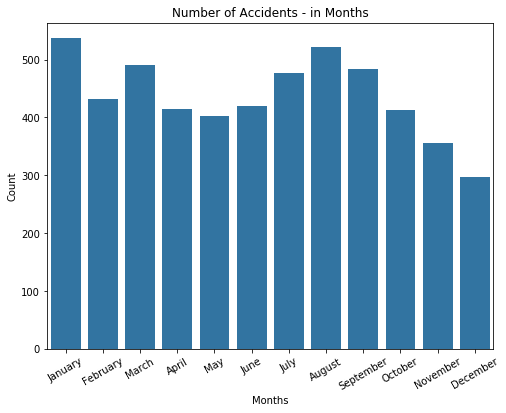

In [16]:
# order the months value in chronological order
level_order = ['January', 'February', 'March', 'April','May','June','July','August','September','October','November','December']
month_order = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
test_df['month'] = test_df['month'].astype(month_order)


plt.figure(figsize = [8,6]);
sns.countplot(data = test_df, x = 'month', color = base_color);
plt.xticks(rotation = 30);
plt.ylabel('Count');
plt.xlabel('Months');
plt.title('Number of Accidents - in Months');

From the above observations, we know that most number or accidents occurred in the month of January, followed by August and the least being December.
Further more, I would like to explore more on the caused of the accidents during these months.

In [18]:
test_df['day'].value_counts()

15    200
08    197
03    189
02    185
09    184
06    182
17    181
24    180
14    180
10    180
11    179
27    178
12    174
19    173
18    170
22    170
04    169
05    168
21    168
16    165
01    162
13    161
07    160
25    159
28    157
20    154
23    154
29    152
26    152
30    151
31    108
Name: day, dtype: int64

In [19]:
test_df['year'].value_counts()

1985    68
1964    68
1950    68
1979    68
1975    68
1953    68
1951    68
1962    68
1976    68
1973    68
1966    68
1978    68
1974    68
1988    68
1960    68
1969    68
1972    67
2001    67
1998    67
1995    67
1989    67
1968    67
1958    67
1948    67
1992    67
2000    67
1990    67
1970    67
1947    67
1946    67
        ..
1934    30
2012    29
1939    28
1932    28
1933    28
1930    26
2016    24
2015    22
1940    22
1941    22
1927    20
2018    19
1920    18
2017    14
1926    13
1922    13
1921    12
1923    12
1925    11
1919     8
1917     7
1924     7
1916     5
1918     4
1913     3
1915     2
1912     1
1908     1
2019     1
1909     1
Name: year, Length: 109, dtype: int64

In [20]:
test_df.query('year =="1985"')

,date,time,operator,flight_number,route,aircraft_type,registration,cn_ln,ground,summary,...,tot_boarded_count,tot_passengers_boarded,tot_crews_boarded,tot_fatalities_count,passengers_fatalities,tot_crews_fatalities,reason,month,day,year
3373,"January 01, 1985",20:30,Eastern Air Lines,980,"Asuncion, Paraguay - La Paz, Bolivia",Boeing B-727-225 Adv,N819EA,22556/1793,0,The aircraft hit Mt. Illimani at an altitude o...,...,29.0,19.0,10.0,29.0,19.0,10.0,unknown,January,01,1985
3374,"January 09, 1985",07:00,TPI International Airways,-,Detroit - Kansas City,Lockheed L-188AF Electra,N357Q,1044,0,The cargo plane executed a missed approach bec...,...,3.0,0.0,3.0,3.0,0.0,3.0,IFR,January,09,1985
3375,"January 18, 1985",00:00,CAAC,5109,Nanjing - Jinan,Antonov AN-24B,B-434,27308110,0,Crashed after overshooting the runway in rain ...,...,41.0,34.0,7.0,38.0,31.0,7.0,weather,January,18,1985
3376,"January 19, 1985",08:22,Cubana de Aviacion,-,Havana - Managua,Ilyushin IL-18D,CU-T899,188011102,0,The airliner crashed after takeoff. Failure of...,...,38.0,33.0,5.0,38.0,33.0,5.0,unknown,January,19,1985
3377,"January 20, 1985",23:15,Air Taxi - EMS,-,"Albuquerque, NM - Taos, NM -",Bell 206 L-1,N40TE,45712,0,The helicopter crashed in open terrain during ...,...,3.0,2.0,1.0,3.0,2.0,1.0,weather,January,20,1985
3378,"January 21, 1985",01:04,Galaxy Airlines,203,"Reno, NV - Minneapolis-St. Paul, MN",Lockheed L-188A Electra,N5532,1121,0,The aircraft crashed while returning to the ai...,...,71.0,65.0,6.0,70.0,64.0,6.0,engine failure,January,21,1985
3379,"January 22, 1985",09:35,Military - U.S. Air Force,-,Howard AFB - Trujillo AP,Lockheed C-130A,56-0501,3109,0,"Crashed into the Caribbean sea, 8 miles northw...",...,21.0,16.0,5.0,21.0,16.0,5.0,landing or taking off,January,22,1985
3380,"January 23, 1985",10:35,Aerolineas Centrales de Colombia,-,Medellin - Quibdo,de Havilland Canada DHC-6 Twin Otter 300,HK-1910,497,0,"Crashed into a mountain at 11,500 ft. In rain...",...,23.0,21.0,2.0,23.0,21.0,2.0,IFR,January,23,1985
3381,"January 23, 1985",10:35,AIRES Colombia,585,Florencia - Cali,Embraer 110P1 Bandeirante,HK-2638,110341,0,"The aircraft crashed into a mountain at 8,500 ...",...,17.0,15.0,2.0,17.0,15.0,2.0,weather,January,23,1985
3382,"February 01, 1985",08:01,Aeroflot,7841,Minsk - Leningrad,Tupolev TU-134A,CCCP-65910,63971,0,The aircraft crashed shortly after taking off ...,...,80.0,74.0,6.0,58.0,55.0,3.0,engine failure,February,01,1985


In [5]:
df1 = pd.read_csv('plane_crash_cleaned_data.csv', index_col = 'date', parse_dates = True)

In [6]:
df1.head()

,time,operator,flight_number,route,aircraft_type,registration,cn_ln,ground,summary,region,country,operator_type,tot_boarded_count,tot_passengers_boarded,tot_crews_boarded,tot_fatalities_count,passengers_fatalities,tot_crews_fatalities,reason
date,,,,,,,,,,,,,,,,,,,
1908-09-17,17:18,Military - U.S. Army,-,Demonstration,Wright Flyer III,-,1,0,"During a demonstration flight, a U.S. Army fly...",Fort Myer,Virginia,Military,2.0,1.0,1.0,1.0,1.0,0.0,engine failure
1909-09-07,00:00,-,-,Air show,Wright Byplane,SC1,-,0,Eugene Lefebvre was the first pilot to ever be...,Juvisy-sur-Orge,France,Commercial,1.0,0.0,1.0,1.0,0.0,0.0,unknown
1912-07-12,06:30,Military - U.S. Navy,-,Test flight,Dirigible,-,-,0,First U.S. dirigible Akron exploded just offsh...,Atlantic City,New Jersey,Military,5.0,0.0,5.0,5.0,0.0,5.0,unknown
1913-08-06,00:00,Private,-,-,Curtiss seaplane,-,-,0,The first fatal airplane accident in Canada oc...,Victoria British Columbia,Canada,Commercial,1.0,0.0,1.0,1.0,0.0,1.0,weather
1913-09-09,18:30,Military - German Navy,-,-,Zeppelin L-1 (airship),-,-,0,The airship flew into a thunderstorm and encou...,Over the North Sea,-,Military,20.0,NaN,NaN,14.0,NaN,NaN,weather
